# Housing data discrimination 
NOTE: This analysis was done with support from Ai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#DATAFRAME1 (df) source data from Hennepin county
df = pd.read_csv("../../Data/mortgage_covenant_data.csv")

In [3]:
df.head(25)

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN
5,2023,2.716307e+10,Race Not Available,6,185000.0,245000.0,NaN,6.250,20.25,152.30,10,0.0,False,NaN
6,2023,2.712303e+10,Race Not Available,6,235000.0,245000.0,NaN,6.750,84.32,39.16,10,0.0,False,NaN
7,2023,2.708595e+10,Race Not Available,6,225000.0,225000.0,NaN,6.250,9.68,115.40,10,0.0,False,NaN
8,2023,2.700305e+10,Race Not Available,6,315000.0,325000.0,NaN,7.125,18.86,86.27,10,0.0,False,NaN
9,2023,2.713700e+10,Race Not Available,6,195000.0,235000.0,NaN,6.625,18.53,69.66,10,0.0,False,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

## Question 1: Is there a relationship between covenant density and property values: 

In [8]:
#Evaluate covenant_density categories.
df['covenant_density'].value_counts(dropna=False)

covenant_density
NaN                 89762
Low (1-50)           4537
Very High (>200)     3140
Medium (51-100)      1772
High (101-200)       1720
Name: count, dtype: int64

In [9]:
#Compare average property values across `covenant_density` categories.
df.groupby('covenant_density')['property_value'].describe()

,count,mean,std,min,25%,50%,75%,max
covenant_density,,,,,,,,
High (101-200),1438.0,547739.916551,1.749168e+06,55000.0,305000.0,375000.0,522500.0,64405000.0
Low (1-50),3779.0,418831.701508,3.404951e+05,5000.0,265000.0,325000.0,435000.0,7625000.0
Medium (51-100),1504.0,567187.500000,1.682592e+06,55000.0,275000.0,365000.0,525000.0,48055000.0
Very High (>200),2660.0,506902.255639,4.906733e+05,25000.0,305000.0,385000.0,545000.0,14205000.0


In [10]:
#Check to see if certain covenant density levels correspond to significantly lower or higher property values

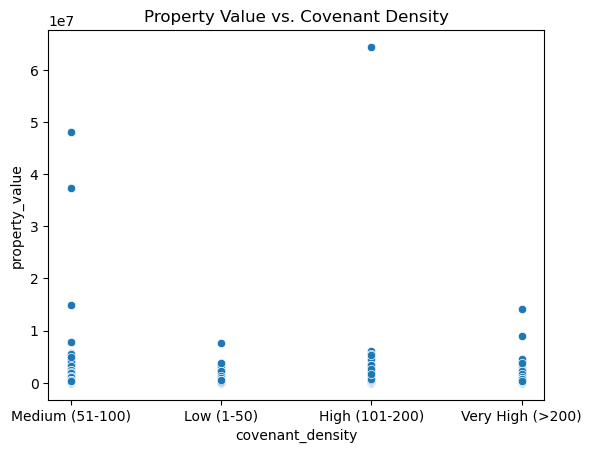

In [11]:
#CHART1 - average property values by covenant density groups
sns.scatterplot(x='covenant_density', y='property_value', data=df)
plt.title("Property Value vs. Covenant Density")
plt.show()


In [12]:
#oneway analysis of variance to see if the means are statistically different
from scipy.stats import f_oneway

groups = [df[df['covenant_density'] == cat]['property_value'].dropna() for cat in df['covenant_density'].unique() if pd.notna(cat)]
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")


ANOVA F-statistic: 10.79, P-value: 0.0000


In [13]:
#tukey's test to see which groups differ
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NaN values to avoid errors
df_tukey = df[['property_value', 'covenant_density']].dropna()

# Perform Tukey's test
tukey = pairwise_tukeyhsd(df_tukey['property_value'], df_tukey['covenant_density'])

# Print the test results
print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
     group1          group2        meandiff  p-adj     lower        upper    reject
-----------------------------------------------------------------------------------
 High (101-200)       Low (1-50) -128908.215 0.0003 -210006.9519 -47809.4782   True
 High (101-200)  Medium (51-100)  19447.5834 0.9549  -77088.4685 115983.6354  False
 High (101-200) Very High (>200) -40837.6609  0.611 -126509.3395  44834.0176  False
     Low (1-50)  Medium (51-100) 148355.7985    0.0   68556.4213 228155.1756   True
     Low (1-50) Very High (>200)  88070.5541 0.0036   21825.7975 154315.3107   True
Medium (51-100) Very High (>200) -60285.2444 0.2572 -144727.9586  24157.4699  False
-----------------------------------------------------------------------------------


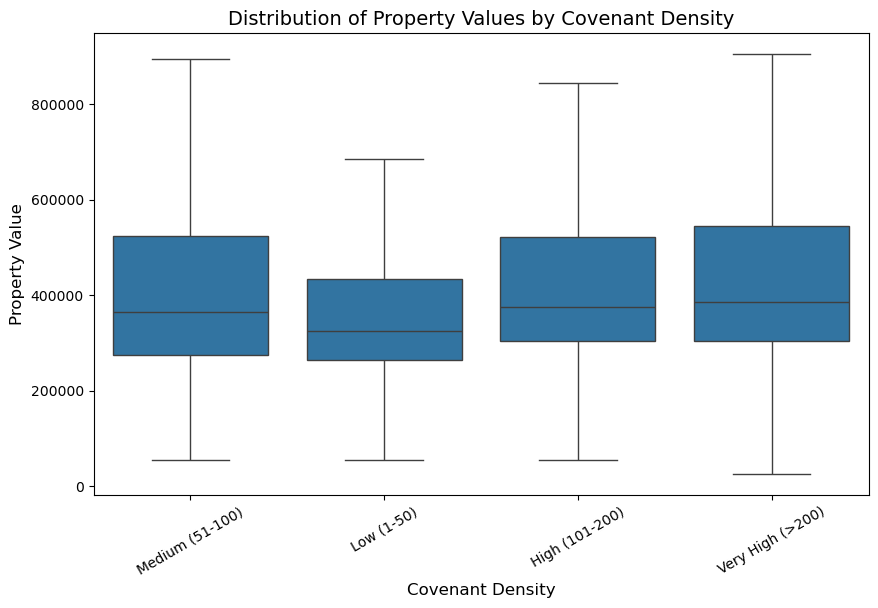

In [14]:
#boxplot of property value and covenant density
plt.figure(figsize=(10, 6))
sns.boxplot(x='covenant_density', y='property_value', data=df, showfliers=False)

plt.xlabel("Covenant Density", fontsize=12)
plt.ylabel("Property Value", fontsize=12)
plt.title("Distribution of Property Values by Covenant Density", fontsize=14)
plt.xticks(rotation=30)
plt.show()


## Question 2: is there a difference in the average property values in historically covenanted vs. non-covenanted areas.

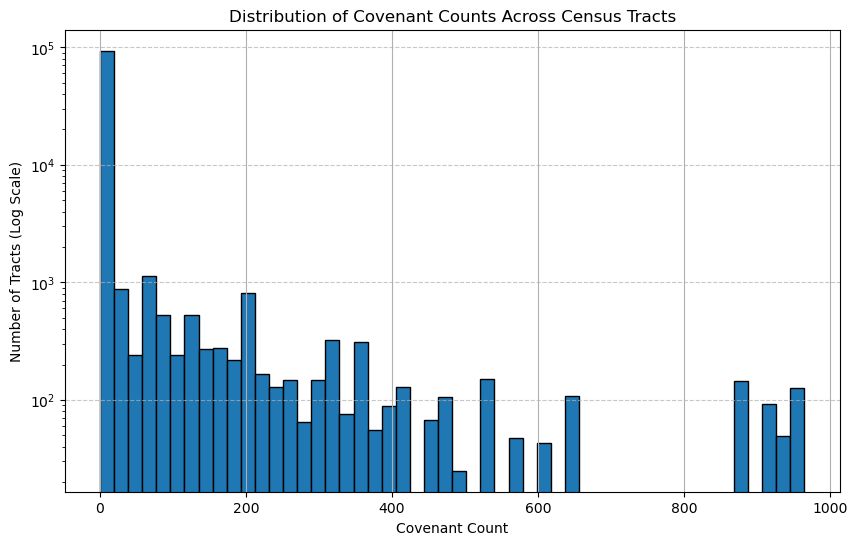

count    100931.000000
mean         17.408101
std          84.973673
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         965.000000
Name: covenant_count, dtype: float64


In [15]:
#Check the distribution of covenant counts to determine a threshold for a YES (historically covenanted) or NO (non-covenanted) areas
import matplotlib.pyplot as plt

# Plot the distribution of covenant_count
plt.figure(figsize=(10, 6))
df['covenant_count'].hist(bins=50, edgecolor='black', log=True)  # Log scale for better visualization
plt.xlabel("Covenant Count")
plt.ylabel("Number of Tracts (Log Scale)")
plt.title("Distribution of Covenant Counts Across Census Tracts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary statistics to get an idea of distribution
print(df['covenant_count'].describe())


In [16]:
# Count how many tracts have covenants by thresholds
thresholds = [1, 5, 10, 20, 50, 100, 200]
for t in thresholds:
    print(f"Covenant count ≥ {t}: {df[df['covenant_count'] >= t].shape[0]} tracts")


Covenant count ≥ 1: 11169 tracts
Covenant count ≥ 5: 9184 tracts
Covenant count ≥ 10: 8520 tracts
Covenant count ≥ 20: 7724 tracts
Covenant count ≥ 50: 6632 tracts
Covenant count ≥ 100: 4945 tracts
Covenant count ≥ 200: 3140 tracts


In [17]:
#DATAFRAME2 (df) includes a column for 'Is Covenanted which includes tracts where the covenant counts are >= 10 covenants. 
#This is simply a balance between tracts where covenant's exist and those tracts that have a density (>=10) of covenants

# Create the new column based on the threshold (covenant_count >= 10)
df['is_covenanted'] = df['covenant_count'] >= 10

# Verify the number of covenanted vs. non-covenanted tracts
print(df['is_covenanted'].value_counts())


is_covenanted
False    92411
True      8520
Name: count, dtype: int64


In [20]:
df[['covenant_count', 'is_covenanted']].sample(25)


,covenant_count,is_covenanted
54697,0.0,False
80583,0.0,False
82167,0.0,False
74648,0.0,False
80630,0.0,False
51245,4.0,False
53451,0.0,False
88393,88.0,True
26549,0.0,False
62039,64.0,True


In [22]:
#summary statistics to see if there are differences between covenanted and non-covenented prop values.
summary_stats = df.groupby('is_covenanted')['property_value'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
is_covenanted,,,,,,,,
False,76302.0,388435.165526,1.200894e+06,5000.0,235000.0,315000.0,435000.0,111325000.0
True,7189.0,508491.445264,1.150458e+06,25000.0,295000.0,365000.0,515000.0,64405000.0


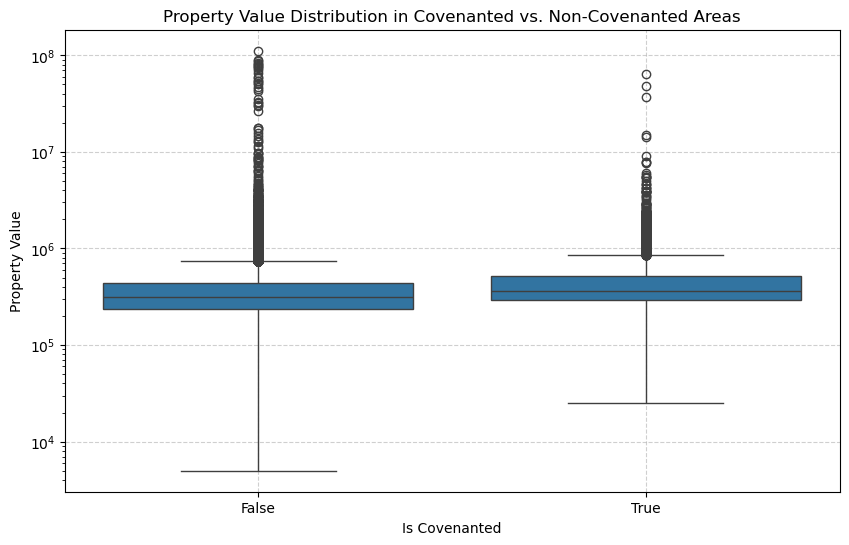

In [24]:
#Chart
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['is_covenanted'], y=df['property_value'])
plt.xlabel("Is Covenanted")
plt.ylabel("Property Value")
plt.title("Property Value Distribution in Covenanted vs. Non-Covenanted Areas")
plt.yscale("log") 
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Background Research sourced from ChatGPT4o.

What is a tract? 
A **census tract** is **much larger** than a single home or property—it's a **geographic unit used for statistical purposes** by the U.S. Census Bureau.

### Key Facts About Census Tracts**
- **Size:** A census tract typically covers a **few thousand people** (average population is **4,000** but can range from **1,200 to 8,000 people**).
- **Geography:** It includes **multiple blocks** (a block might contain dozens of homes), so a tract **spans multiple properties, households, and businesses**.
- **Purpose:** Tracts are designed to be **relatively homogeneous in terms of economic status, demographics, and living conditions**.
- **A tract is not a single home/property**—it’s a **neighborhood-sized unit**.
- **Property values in a tract are an aggregate measure**—they reflect an average or median across **all homes in that area**.


In [27]:
#remove NaNs from property value



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

In [32]:
# Drop NaN values in property_value column
df_propertyclean = df.dropna(subset=['property_value'])

In [34]:
# Separate property values based on is_covenanted
covenanted_values = df_propertyclean[df_propertyclean['is_covenanted'] == True]['property_value']
non_covenanted_values = df_propertyclean[df_propertyclean['is_covenanted'] == False]['property_value']

In [52]:
# Summary stats for comparison

# Drop NaNs in property values
df_propertyclean = df.dropna(subset=['property_value'])

# Group by covenanted status and describe property values
summary_stats = df_propertyclean.groupby('is_covenanted')['property_value'].describe()

# Print the summary statistics
print(summary_stats)


                 count           mean           std      min       25%  \
is_covenanted                                                            
False          76302.0  388435.165526  1.200894e+06   5000.0  235000.0   
True            7189.0  508491.445264  1.150458e+06  25000.0  295000.0   

                    50%       75%          max  
is_covenanted                                   
False          315000.0  435000.0  111325000.0  
True           365000.0  515000.0   64405000.0  


In [53]:
#create summary table
property_value_summary = pd.DataFrame({
    "Category": ["Non-Covenanted", "Covenanted"],
    "Count": [76302, 7189],
    "Mean ($)": [388435, 508491],
    "Std Dev ($)": [1200894, 1150458],
    "Min ($)": [5000, 25000],
    "25% ($)": [235000, 295000],
    "Median (50%) ($)": [315000, 365000],
    "75% ($)": [435000, 515000],
    "Max ($)": [111325000, 64405000]
})

property_value_summary["Mean ($)"] = property_value_summary["Mean ($)"].apply(lambda x: f"${x:,.0f}")
property_value_summary["Std Dev ($)"] = property_value_summary["Std Dev ($)"].apply(lambda x: f"${x:,.0f}")
property_value_summary["Min ($)"] = property_value_summary["Min ($)"].apply(lambda x: f"${x:,.0f}")
property_value_summary["25% ($)"] = property_value_summary["25% ($)"].apply(lambda x: f"${x:,.0f}")
property_value_summary["Median (50%) ($)"] = property_value_summary["Median (50%) ($)"].apply(lambda x: f"${x:,.0f}")
property_value_summary["75% ($)"] = property_value_summary["75% ($)"].apply(lambda x: f"${x:,.0f}")
property_value_summary["Max ($)"] = property_value_summary["Max ($)"].apply(lambda x: f"${x:,.0f}")

print(property_value_summary.to_string(index=False))


      Category  Count Mean ($) Std Dev ($) Min ($)  25% ($) Median (50%) ($)  75% ($)      Max ($)
Non-Covenanted  76302 $388,435  $1,200,894  $5,000 $235,000         $315,000 $435,000 $111,325,000
    Covenanted   7189 $508,491  $1,150,458 $25,000 $295,000         $365,000 $515,000  $64,405,000


In [30]:
#t test to see if the differences are significant.

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test
t_stat, p_value = ttest_ind(covenanted_values, non_covenanted_values, equal_var=False)
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Perform Mann-Whitney U test (non-parametric alternative)
u_stat, p_value_mwu = mannwhitneyu(covenanted_values, non_covenanted_values, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value_mwu:.4f}")


T-Test: t-statistic = 8.4261, p-value = 0.0000
Mann-Whitney U Test: U-statistic = 335968175.0, p-value = 0.0000


In [35]:
#cohen's d to determine if the differences between covenanted and non-covenanted property values are significant in teh real world (for decisoin making)
import numpy as np

# Function to calculate Cohen's d
def cohen_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)  # Sample variances
    pooled_std = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))  # Pooled standard deviation
    return (np.mean(x1) - np.mean(x2)) / pooled_std

# Drop NaN values in property_value column
df_clean = df.dropna(subset=['property_value'])

# Separate property values based on is_covenanted
covenanted_values = df_clean[df_clean['is_covenanted'] == True]['property_value']
non_covenanted_values = df_clean[df_clean['is_covenanted'] == False]['property_value']

# Compute Cohen's d
cohen_d_value = cohen_d(covenanted_values, non_covenanted_values)

# Print result
print(f"Cohen's d: {cohen_d_value:.4f}")



Cohen's d: 0.1003


## Question 3: Is there a demographic difference between covenanted and non-covenanted areas?

In [37]:
# Summary statistics for tract minority population percentage
summary_stats = df.groupby('is_covenanted')['tract_minority_population_percent'].describe()
print(summary_stats)


                 count       mean        std   min    25%    50%    75%    max
is_covenanted                                                                 
False          92411.0  22.520764  17.497745  0.00   9.83  18.02  29.25  95.63
True            8520.0  26.705662  14.344239  6.93  16.87  21.46  33.74  72.12


In [41]:
#summary table for comparison purposes
minority_summary = pd.DataFrame({
    "Category": ["Non-Covenanted", "Covenanted"],
    "Count": [92411, 8520],
    "Mean Minority %": [22.52, 26.71],
    "Std Dev": [17.50, 14.34],
    "Min": [0.00, 6.93],
    "25%": [9.83, 16.87],
    "Median (50%)": [18.02, 21.46],
    "75%": [29.25, 33.74],
    "Max": [95.63, 72.12]
})

minority_summary["Mean Minority %"] = minority_summary["Mean Minority %"].apply(lambda x: f"{x:.2f}%")
minority_summary["Std Dev"] = minority_summary["Std Dev"].apply(lambda x: f"{x:.2f}")
minority_summary["Min"] = minority_summary["Min"].apply(lambda x: f"{x:.2f}%")
minority_summary["25%"] = minority_summary["25%"].apply(lambda x: f"{x:.2f}%")
minority_summary["Median (50%)"] = minority_summary["Median (50%)"].apply(lambda x: f"{x:.2f}%")
minority_summary["75%"] = minority_summary["75%"].apply(lambda x: f"{x:.2f}%")
minority_summary["Max"] = minority_summary["Max"].apply(lambda x: f"{x:.2f}%")

print(minority_summary.to_string(index=False))


      Category  Count Mean Minority % Std Dev   Min    25% Median (50%)    75%    Max
Non-Covenanted  92411          22.52%   17.50 0.00%  9.83%       18.02% 29.25% 95.63%
    Covenanted   8520          26.71%   14.34 6.93% 16.87%       21.46% 33.74% 72.12%


In [38]:
#t test to verify statistical significance
from scipy.stats import ttest_ind

# Run independent t-test
t_stat, p_value = ttest_ind(
    df[df['is_covenanted'] == True]['tract_minority_population_percent'].dropna(),
    df[df['is_covenanted'] == False]['tract_minority_population_percent'].dropna(),
    equal_var=False  # Assume unequal variance
)
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-Test: t-statistic = 25.2529, p-value = 0.0000


## Question 4: Are covenanted areas economically disadvantaged today?

In [39]:
#compare income levels between historically covenanted and non-covenanted areas. 
# Summary statistics for income by is_covenanted
summary_income = df.groupby('is_covenanted')['income'].describe()
print(summary_income)


                 count        mean          std      min   25%    50%    75%  \
is_covenanted                                                                  
False          80876.0  146.759583  5814.956020 -34157.0  66.0   95.0  143.0   
True            7324.0  173.330830   267.213127    -54.0  79.0  116.0  190.0   

                     max  
is_covenanted             
False          1651000.0  
True             10415.0  


In [40]:
#create a table for comparison purposes
income_summary = pd.DataFrame({
    "Category": ["Non-Covenanted", "Covenanted"],
    "Mean Income": [146759.58, 173330.83],
    "Median Income": [95000, 116000],
    "Std Dev": [5814956.02, 267213.13],
    "Max Income": [1651000, 10415]
})

income_summary["Mean Income"] = income_summary["Mean Income"].apply(lambda x: f"${x:,.2f}K")
income_summary["Median Income"] = income_summary["Median Income"].apply(lambda x: f"${x:,.0f}K")
income_summary["Std Dev"] = income_summary["Std Dev"].apply(lambda x: f"${x:,.2f}K")
income_summary["Max Income"] = income_summary["Max Income"].apply(lambda x: f"${x:,.2f}M" if x >= 1000000 else f"${x:,.2f}K")

print(income_summary.to_string(index=False))



      Category  Mean Income Median Income        Std Dev     Max Income
Non-Covenanted $146,759.58K      $95,000K $5,814,956.02K $1,651,000.00M
    Covenanted $173,330.83K     $116,000K   $267,213.13K    $10,415.00K


In [44]:
#t-test on income

from scipy.stats import ttest_ind

# Drop NaNs to ensure valid calculations
income_covenanted = df[df['is_covenanted'] == True]['income'].dropna()
income_non_covenanted = df[df['is_covenanted'] == False]['income'].dropna()

t_stat, p_value = ttest_ind(income_covenanted, income_non_covenanted, equal_var=False)  # Welch's t-test (assumes unequal variance)
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-Test: t-statistic = 1.2846, p-value = 0.1989


## Question 5: Are covenanted areas are still economically disadvantaged compared to the metro area? 

In [43]:
# Summary stats for comparison
summary_economic = df.groupby('is_covenanted')['tract_to_msa_income_percentage'].describe()
print(summary_economic)


                 count        mean        std    min    25%     50%     75%  \
is_covenanted                                                                 
False          92411.0  100.646540  31.578210   0.00  81.68   98.95  118.34   
True            8520.0  114.471754  37.823941  46.38  85.71  106.27  136.64   

                  max  
is_covenanted          
False          236.76  
True           240.43  


In [45]:
#format this for easier review
msa_income_summary = pd.DataFrame({
    "Category": ["Non-Covenanted", "Covenanted"],
    "Count": [92411, 8520],
    "Mean (%)": [100.65, 114.47],
    "Std Dev": [31.58, 37.82],
    "Min (%)": [0.00, 46.38],
    "25%": [81.68, 85.71],
    "Median (50%)": [98.95, 106.27],
    "75%": [118.34, 136.64],
    "Max (%)": [236.76, 240.43]
})


msa_income_summary["Mean (%)"] = msa_income_summary["Mean (%)"].apply(lambda x: f"{x:.2f}%")
msa_income_summary["Std Dev"] = msa_income_summary["Std Dev"].apply(lambda x: f"{x:.2f}")
msa_income_summary["Min (%)"] = msa_income_summary["Min (%)"].apply(lambda x: f"{x:.2f}%")
msa_income_summary["25%"] = msa_income_summary["25%"].apply(lambda x: f"{x:.2f}%")
msa_income_summary["Median (50%)"] = msa_income_summary["Median (50%)"].apply(lambda x: f"{x:.2f}%")
msa_income_summary["75%"] = msa_income_summary["75%"].apply(lambda x: f"{x:.2f}%")
msa_income_summary["Max (%)"] = msa_income_summary["Max (%)"].apply(lambda x: f"{x:.2f}%")

print(msa_income_summary.to_string(index=False))


      Category  Count Mean (%) Std Dev Min (%)    25% Median (50%)     75% Max (%)
Non-Covenanted  92411  100.65%   31.58   0.00% 81.68%       98.95% 118.34% 236.76%
    Covenanted   8520  114.47%   37.82  46.38% 85.71%      106.27% 136.64% 240.43%


In [47]:
#t-test for significance
from scipy.stats import ttest_ind

# Drop NaNs to ensure valid calculations
msa_income_covenanted = df[df['is_covenanted'] == True]['tract_to_msa_income_percentage'].dropna()
msa_income_non_covenanted = df[df['is_covenanted'] == False]['tract_to_msa_income_percentage'].dropna()

# Perform the independent t-test
t_stat, p_value = ttest_ind(msa_income_covenanted, msa_income_non_covenanted, equal_var=False)  # Welch's T-test

# Print the results
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-Test: t-statistic = 32.7040, p-value = 0.0000


# Findings

# Conclusions

# Recommendations